In [11]:
import xarray
import numpy
import matplotlib.pyplot as plt
import os.path
import scipy.fft

In [19]:
Smg006SaK64 = xarray.open_dataset('SadEnergy.Smag006.64x64/prog.nc')
Smg006SaK128 = xarray.open_dataset('SadEnergy.Smag006.128x128/prog.nc')
Smg006SaK256 = xarray.open_dataset('SadEnergy.Smag006.256x256/prog.nc')
# Smg006SaK512 = xarray.open_dataset('SadEnergy.Smag006.512x512/prog.nc')

Smg006SaZ64 = xarray.open_dataset('SadEnstrophy.Smag006.64x64/prog.nc')
Smg006SaZ128 = xarray.open_dataset('SadEnstrophy.Smag006.128x128/prog.nc')
Smg006SaZ256 = xarray.open_dataset('SadEnstrophy.Smag006.256x256/prog.nc')
# Smg006SaZ512 = xarray.open_dataset('SadEnstrophy.Smag006.512x512/prog.nc')

Smg006AH64 = xarray.open_dataset('ArakawaHsu.Smag006.64x64/prog.nc')
Smg006AH128 = xarray.open_dataset('ArakawaHsu.Smag006.128x128/prog.nc')
Smg006AH256 = xarray.open_dataset('ArakawaHsu.Smag006.256x256/prog.nc')
Smg006AH512 = xarray.open_dataset('ArakawaHsu.Smag006.512x512/prog.nc')
Smg020AH512 = xarray.open_dataset('ArakawaHsu.Smag020.512x512/prog.nc')

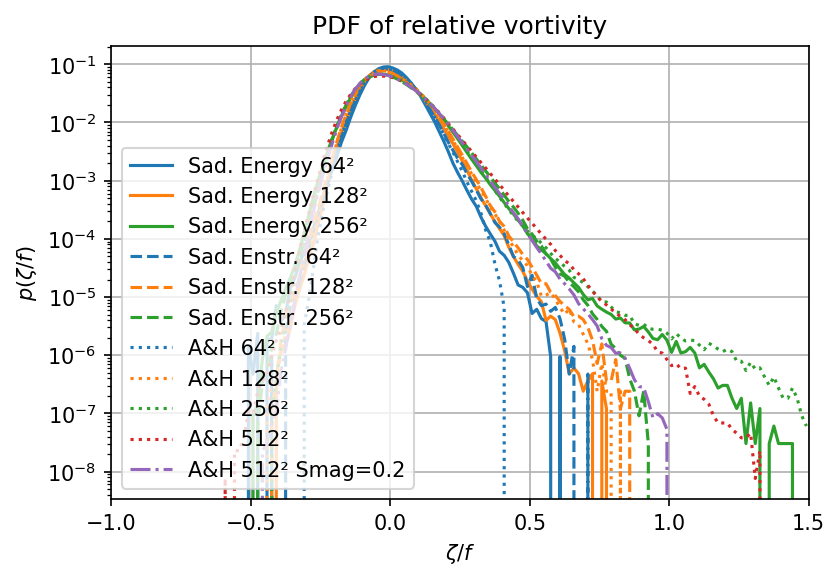

In [20]:
def Zpdf(ds):
    p,b = numpy.histogram( 1e4*ds.RV.isel(Time=slice(-500,None),zl=0), bins=numpy.linspace(-1,1.5,151));
    return 0.5*(b[:-1]+b[1:]), p/p.sum()

plt.figure(dpi=150);

plt.plot( *Zpdf( Smg006SaK64 ), label='Sad. Energy 64²')
plt.plot( *Zpdf( Smg006SaK128 ), label='Sad. Energy 128²')
plt.plot( *Zpdf( Smg006SaK256 ), label='Sad. Energy 256²')
# plt.plot( *Zpdf( Smg006SaK512 ), label='Sad. Energy 512²')

plt.plot( *Zpdf( Smg006SaZ64 ), '--C0', label='Sad. Enstr. 64²')
plt.plot( *Zpdf( Smg006SaZ128 ), '--C1', label='Sad. Enstr. 128²')
plt.plot( *Zpdf( Smg006SaZ256 ), '--C2', label='Sad. Enstr. 256²')
# plt.plot( *Zpdf( Smg006SaZ512 ), '--C3', label='Sad. Enstr. 512²')

plt.plot( *Zpdf( Smg006AH64 ), ':C0', label='A&H 64²')
plt.plot( *Zpdf( Smg006AH128 ), ':C1', label='A&H 128²')
plt.plot( *Zpdf( Smg006AH256 ), ':C2', label='A&H 256²')
plt.plot( *Zpdf( Smg006AH512 ), ':C3', label='A&H 512²')
plt.plot( *Zpdf( Smg020AH512 ), '-.C4', label='A&H 512² Smag=0.2')

plt.legend(); plt.grid();
plt.xlabel('$\zeta / f$'); plt.ylabel('$p(\zeta/f)$'); plt.title('PDF of relative vortivity');
plt.xlim(-.5,.5); plt.yscale('linear');
plt.xlim(-1,1.5); plt.yscale('log');

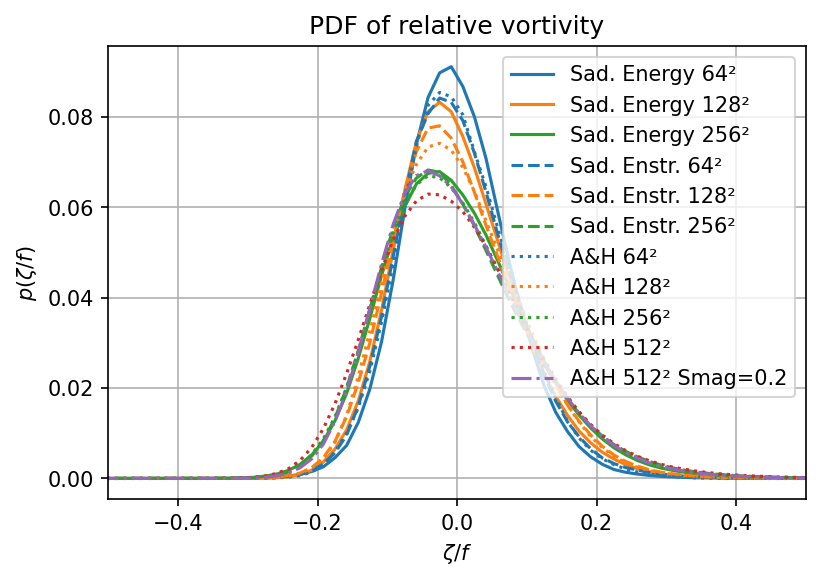

In [21]:
def Zpdf(ds):
    p,b = numpy.histogram( 1e4*ds.RV.isel(Time=slice(-500,None),zl=0), bins=numpy.linspace(-1,1.5,151));
    return 0.5*(b[:-1]+b[1:]), p/p.sum()

plt.figure(dpi=150);

plt.plot( *Zpdf( Smg006SaK64 ), label='Sad. Energy 64²')
plt.plot( *Zpdf( Smg006SaK128 ), label='Sad. Energy 128²')
plt.plot( *Zpdf( Smg006SaK256 ), label='Sad. Energy 256²')
# plt.plot( *Zpdf( Smg006SaK512 ), label='Sad. Energy 512²')

plt.plot( *Zpdf( Smg006SaZ64 ), '--C0', label='Sad. Enstr. 64²')
plt.plot( *Zpdf( Smg006SaZ128 ), '--C1', label='Sad. Enstr. 128²')
plt.plot( *Zpdf( Smg006SaZ256 ), '--C2', label='Sad. Enstr. 256²')
# plt.plot( *Zpdf( Smg006SaZ512 ), '--C3', label='Sad. Enstr. 512²')

plt.plot( *Zpdf( Smg006AH64 ), ':C0', label='A&H 64²')
plt.plot( *Zpdf( Smg006AH128 ), ':C1', label='A&H 128²')
plt.plot( *Zpdf( Smg006AH256 ), ':C2', label='A&H 256²')
plt.plot( *Zpdf( Smg006AH512 ), ':C3', label='A&H 512²')
plt.plot( *Zpdf( Smg020AH512 ), '-.C4', label='A&H 512² Smag=0.2')

plt.legend(); plt.grid();
plt.xlabel('$\zeta / f$'); plt.ylabel('$p(\zeta/f)$'); plt.title('PDF of relative vortivity');
plt.xlim(-.5,.5); plt.yscale('linear');

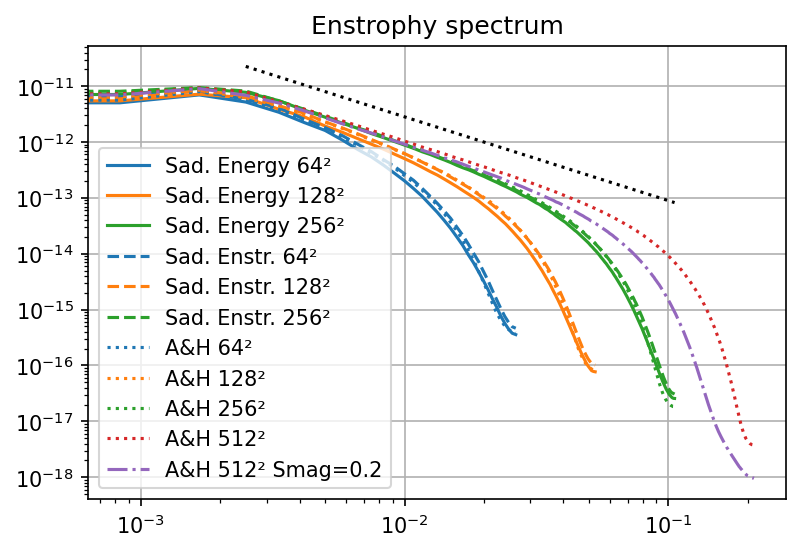

In [22]:
def Zsp(ds):
    ni = ds.RV.shape[-1]-1
    zhat = scipy.fft.rfft( ds.RV.isel(Time=slice(-500,None),zl=0,yq=slice(1,None),xq=slice(1,None)).data )/ni
    dx = (ds.xq[1]-ds.xq[0]).values
    k = scipy.fft.rfftfreq(ni, d=dx )
    k = 2/dx * numpy.sin( 0.5 * dx * k )
    Z = numpy.real( zhat.conjugate() * zhat ).mean(axis=(0,1))
    return k, Z

plt.figure(dpi=150);

k,_ = Zsp( Smg006SaK256 ); plt.plot(k[3:],(5e9*k[3:])**(-1.5),'k:')

plt.loglog( *Zsp( Smg006SaK64 ), label='Sad. Energy 64²' );
plt.loglog( *Zsp( Smg006SaK128 ), label='Sad. Energy 128²' );
plt.loglog( *Zsp( Smg006SaK256 ), label='Sad. Energy 256²' );
# plt.loglog( *Zsp( Smg006SaK512 ), label='Sad. Energy 512²' );

plt.loglog( *Zsp( Smg006SaZ64 ), '--C0', label='Sad. Enstr. 64²' );
plt.loglog( *Zsp( Smg006SaZ128 ), '--C1', label='Sad. Enstr. 128²' );
plt.loglog( *Zsp( Smg006SaZ256 ), '--C2', label='Sad. Enstr. 256²' );
# plt.loglog( *Zsp( Smg006SaZ512 ), '--C3', label='Sad. Enstr. 512²' );

plt.loglog( *Zsp( Smg006AH64 ), ':C0', label='A&H 64²' );
plt.loglog( *Zsp( Smg006AH128 ), ':C1', label='A&H 128²' );
plt.loglog( *Zsp( Smg006AH256 ), ':C2', label='A&H 256²' );
plt.loglog( *Zsp( Smg006AH512 ), ':C3', label='A&H 512²' );
plt.plot( *Zsp( Smg020AH512 ), '-.C4', label='A&H 512² Smag=0.2')

plt.legend(); plt.grid(); plt.title('Enstrophy spectrum');

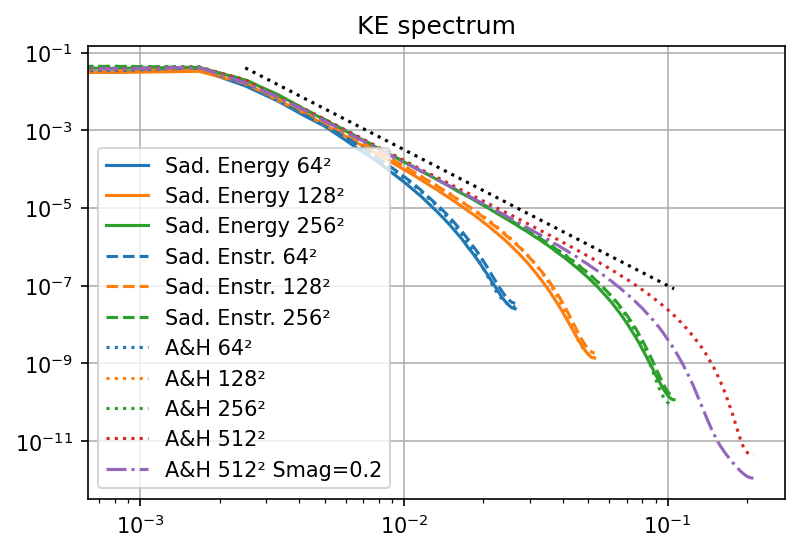

In [23]:
def KEsp(ds):
    ni = ds.v.shape[-1]
    uhat = scipy.fft.rfft( ds.u.isel(Time=slice(-500,None),zl=0,xq=slice(1,None)).data )/ni
    vhat = scipy.fft.rfft( ds.v.isel(Time=slice(-500,None),zl=0,yq=slice(1,None)).data )/ni
    dx = (ds.xq[1]-ds.xq[0]).values
    k = scipy.fft.rfftfreq(ni, d=dx )
    k = 2/dx * numpy.sin( 0.5 * dx * k )
    E = numpy.real( uhat.conjugate() * uhat + vhat.conjugate() * vhat ).mean(axis=(0,1))
    return k, E

plt.figure(dpi=150);

k,_ = Zsp( Smg006SaK256 ); plt.plot(k[3:],(1e3*k[3:])**(-3.5),'k:')

plt.loglog( *KEsp( Smg006SaK64 ), label='Sad. Energy 64²' );
plt.loglog( *KEsp( Smg006SaK128 ), label='Sad. Energy 128²' );
plt.loglog( *KEsp( Smg006SaK256 ), label='Sad. Energy 256²' );
# plt.loglog( *KEsp( Smg006SaK512 ), label='Sad. Energy 512²' );

plt.loglog( *KEsp( Smg006SaZ64 ), '--C0', label='Sad. Enstr. 64²' );
plt.loglog( *KEsp( Smg006SaZ128 ), '--C1', label='Sad. Enstr. 128²' );
plt.loglog( *KEsp( Smg006SaZ256 ), '--C2', label='Sad. Enstr. 256²' );
# plt.loglog( *KEsp( Smg006SaZ512 ), '--C3', label='Sad. Enstr. 512²' );

plt.loglog( *KEsp( Smg006AH64 ), ':C0', label='A&H 64²' );
plt.loglog( *KEsp( Smg006AH128 ), ':C1', label='A&H 128²' );
plt.loglog( *KEsp( Smg006AH256 ), ':C2', label='A&H 256²' );
plt.loglog( *KEsp( Smg006AH512 ), ':C3', label='A&H 512²' );
plt.loglog( *KEsp( Smg020AH512 ), '-.C4', label='A&H 512² Smag=0.2')

plt.legend(); plt.grid(); plt.title('KE spectrum');

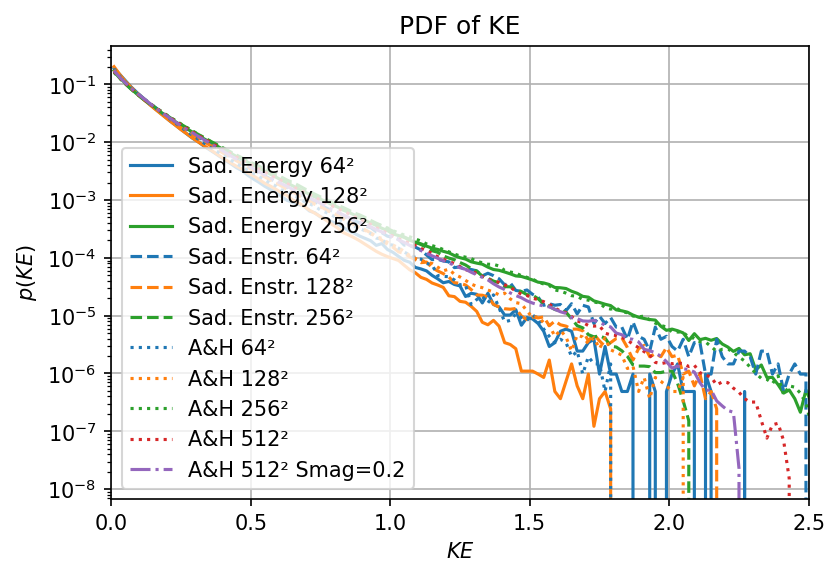

In [25]:
def Kpdf(ds):
    xh,yh = ds.xh, ds.yh
    KE = ( ds.u.isel(Time=slice(-500,None),zl=0)**2 ).interp(xq=xh) + ( ds.v.isel(Time=slice(-500,None),zl=0)**2 ).interp(yq=yh)
    p,b = numpy.histogram( 0.5*KE, bins=numpy.linspace(0.,3.,151));
    return 0.5*(b[:-1]+b[1:]), p/p.sum()

plt.figure(dpi=150);

plt.plot( *Kpdf( Smg006SaK64 ), label='Sad. Energy 64²')
plt.plot( *Kpdf( Smg006SaK128 ), label='Sad. Energy 128²')
plt.plot( *Kpdf( Smg006SaK256 ), label='Sad. Energy 256²')
# plt.plot( *Kpdf( Smg006SaK512 ), label='Sad. Energy 512²')

plt.plot( *Kpdf( Smg006SaZ64 ), '--C0', label='Sad. Enstr. 64²')
plt.plot( *Kpdf( Smg006SaZ128 ), '--C1', label='Sad. Enstr. 128²')
plt.plot( *Kpdf( Smg006SaZ256 ), '--C2', label='Sad. Enstr. 256²')
# plt.plot( *Kpdf( Smg006SaZ512 ), '--C3', label='Sad. Enstr. 512²')

plt.plot( *Kpdf( Smg006AH64 ), ':C0', label='A&H 64²')
plt.plot( *Kpdf( Smg006AH128 ), ':C1', label='A&H 128²')
plt.plot( *Kpdf( Smg006AH256 ), ':C2', label='A&H 256²')
plt.plot( *Kpdf( Smg006AH512 ), ':C3', label='A&H 512²')
plt.plot( *Kpdf( Smg020AH512 ), '-.C4', label='A&H 512² Smag=0.2')

plt.legend(); plt.grid();
plt.xlabel('$KE$'); plt.ylabel('$p(KE)$'); plt.title('PDF of KE');
plt.xlim(0,2.5); plt.yscale('log');

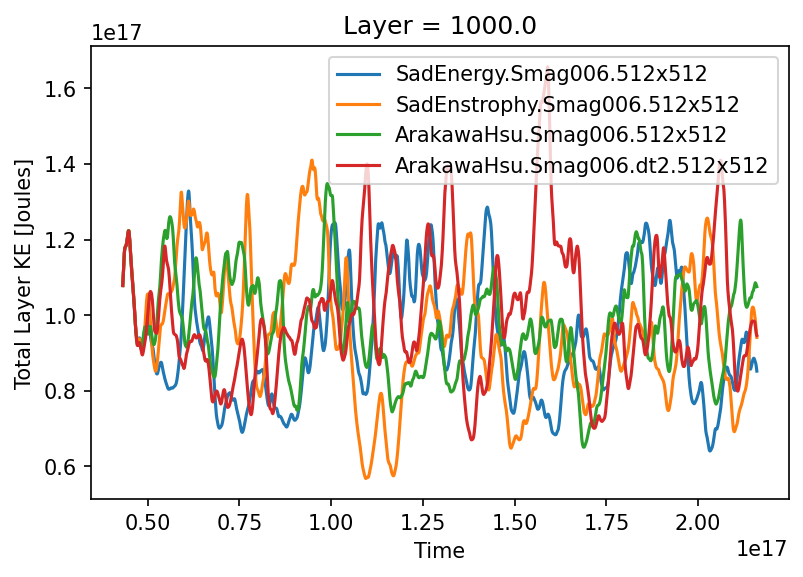

In [20]:
import glob
plt.figure(dpi=150)
for d in glob.glob('*Sm*x*12'):
    f = d+'/ocean.stats.nc'
    if os.path.isfile(f):
        ds = xarray.open_dataset(f)
        ds.KE.isel(Layer=0).plot(label=d)
plt.legend();